<a href="https://colab.research.google.com/github/Brijeshtanwar/Topic-Modeling/blob/main/spcay_text_summarization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
url = """https://raw.githubusercontent.com/Brijeshtanwar/Topic-Modeling/main/voc_data.csv"""
df = pd.read_csv(url,  encoding = 'unicode_escape')

In [3]:
df = df[['CUSTOMER COMMENT', 'Reason']]
df.columns = ['comment', 'topic']

In [4]:
df.isnull().sum()

comment    0
topic      0
dtype: int64

In [5]:
# Drop na 
df.dropna(axis=0, inplace=True)

In [6]:
df.topic.value_counts()

Service                      1570
APPLICATION (WEB/APP)        1074
SERVICE                       335
CHARGES(BRO./DP/LPC ETC.)     332
Others                        321
NOT SPECIFIED                 254
Not Specified                 216
People                        113
Process                        69
PEOPLE                         32
Product                        13
PROCESS                         6
Name: topic, dtype: int64

In [7]:
#lower case
df['topic'] = df['topic'].str.lower()
df['topic'] = df['topic'].str.strip()
df.loc[df.topic=='not specified', 'topic'] = 'others'

In [8]:
df.topic.unique()

array(['service', 'application (web/app)', 'others',
       'charges(bro./dp/lpc etc.)', 'process', 'people', 'product'],
      dtype=object)

In [9]:
topic_dic = {'application (web/app)': 'application',  'charges(bro./dp/lpc etc.)': 'charges', 'service':'service'
, 'others':'others', 'process':'process', 'people':'people', 'product':'product'}

In [10]:
df['topic'] = df['topic'].map(topic_dic)

<Axes: xlabel='count', ylabel='topic'>

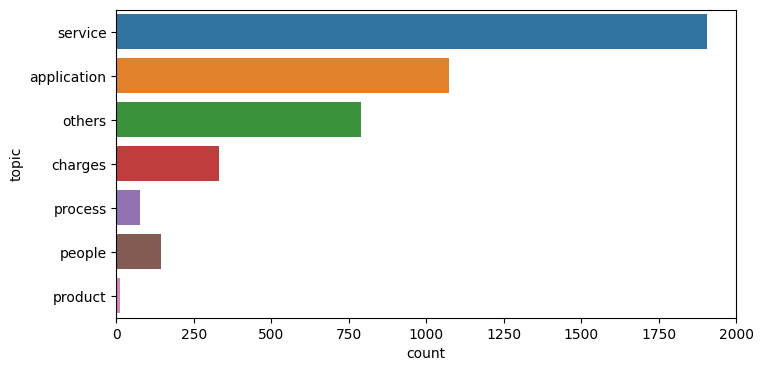

In [11]:
plt.figure(figsize=[8,4])
sns.countplot(y=df['topic'])

In [12]:
# Preprocessing

In [13]:
# Remove integer comments
df = df[df['comment'].apply(lambda x: not isinstance(x, int))]
df.reset_index(drop=True, inplace=True)

#lower case
df['comment'] = df['comment'].str.lower()

In [14]:
import re

In [15]:
def preprocess_text(text):
    ## clean (convert to lowercase and remove punctuations and  characters and then strip)
    text = re.sub(r"[^A-Za-z]+", ' ' , str(text).lower().strip())
    return text

In [16]:
df["x"] = df["comment"].apply(lambda x: preprocess_text(x))
# df['x'] = df['comment']
df['y'] = df['topic']
df.head(10)

,comment,topic,x,y
0,querries where kotak is at disadvantageous pos...,service,querries where kotak is at disadvantageous pos...,service
1,1) same-day money deduction even if we have ma...,application,same day money deduction even if we have marg...,application
2,ndejjejdjx,others,ndejjejdjx,others
3,worst website trading,application,worst website trading,application
4,"no technical support at real time, application...",service,no technical support at real time application ...,service
5,need knowledge and experience person,service,need knowledge and experience person,service
6,please revisit my brokerage and deemat charges...,charges,please revisit my brokerage and deemat charges...,charges
7,iâm waiting for resolution or a meeting with...,service,i m waiting for resolution or a meeting with m...,service
8,i dint interacted so my rating may be a bias b...,service,i dint interacted so my rating may be a bias b...,service
9,no issues with the rm,service,no issues with the rm,service


In [17]:
df = df[['x', 'y']]

In [23]:
text = ". ".join(df[df['y']=='people']['x'])

In [24]:
# SpaCy for text summarization

In [25]:
import spacy

# Load the small English model
nlp = spacy.load("en_core_web_sm")

def summarize_text(input_text, num_sentences=3):
    # Parse the input text with Spacy
    doc = nlp(input_text)

    # Extract the sentences as a list of strings
    sentences = [sent.text.strip() for sent in doc.sents]

    # Calculate the total number of sentences and the number to keep for the summary
    num_total_sentences = len(sentences)
    num_summary_sentences = min(num_sentences, num_total_sentences)

    # Calculate the "importance score" for each sentence
    scores = {}
    for i, sent in enumerate(sentences):
        # Split the sentence into individual words
        words = sent.split()

        # Calculate the average word vector for the sentence
        word_vectors = [nlp(word).vector for word in words if nlp(word).has_vector]
        if len(word_vectors) > 0:
            sent_vector = sum(word_vectors) / len(word_vectors)
        else:
            sent_vector = nlp("")[0].vector

        # Calculate the cosine similarity between the sentence vector and the document vector
        doc_vector = doc.vector
        sim = sent_vector.dot(doc_vector) / (np.linalg.norm(sent_vector) * np.linalg.norm(doc_vector))
        scores[i] = sim

    # Sort the sentences by score and keep the top N
    top_sentences = sorted(scores, key=scores.get, reverse=True)[:num_summary_sentences]

    # Sort the top sentences back into their original order
    summary = [sentences[i] for i in sorted(top_sentences)]

    # Join the summary sentences into a single string
    return " ".join(summary)


In [26]:
input_text = text
summary = summarize_text(input_text, num_sentences=5)
print(summary)


its very unfair to point out only dealer problem kotak securities is very back dated not client friendly please try to value add in various aspect knowledge technical try to reduce brokerage burden dont change dealer frequently bcoz clint dealer relationship make more confidence must improve technology part of your platform technology glitches make us most irritation . its very unfair to point out only dealer problem kotak securities is very back dated not client friendly please try to value add in various aspect knowledge technical try to reduce brokerage burden dont change dealer frequently bcoz clint dealer relationship make more confidence must improve technology part of your platform technology glitches make us most irritation . there should be dedicated person at branch level to advise on the software plat form operation generalists person with no knowledge about the operation of trading platform software from customer s point of view is totally lacking. all kotak securities team

In [ ]:
# Transformers 

In [27]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [28]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 63.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 109.5 MB/s eta 0:00:00


In [29]:
from transformers import pipeline

# Load the pre-trained summarization model
summarizer = pipeline("summarization")



No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [38]:
def generate_summary(text):
    preprocessed_text = text
    
    # Generate the summary using the abstractive summarization model
    summary = summarizer(preprocessed_text, max_length=100, min_length=30, do_sample=False)
    
    # Return the generated summary
    return summary[0]['summary_text']
generate_summary(text)

IndexError: ignored

In [32]:
doc = nlp(text)

In [33]:
text

'awful support. interaction with customersupport to customervalues to customer. please improve your support. not available when support required. that too we understand but no on time support disappoint more. worst customer support they never responded for any calls they will put calls on hold and will disconnect the call totally waste of time with kotak securitiess . yes better support for out of i fia clients. not expected this kind of call support and app from mahindra group . please stop irritating customers by calling everyday if the customer indeed has any issue he she will directly mail or contact your customer support to resolve im extremely tired of getting calls from customer support and im no longer trading on kotak securities . call not castmecar supportplese andher call nambear. we should be provided with advice on shares that are getting delisted already delisted and how to deal with them when i asked the person he blankly replied he does not know then what is the point i

In [36]:
summary = summarizer(text, max_length=1000, min_length=30, do_sample=False)

IndexError: ignored

In [35]:
summary[0]['summary_text']

TypeError: ignored